In [ ]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=2).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 2 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/2 [00:00<?, ?engine/s]

In [ ]:
learning_rates = [0.1]

dfca_gi = []
ifca = []

In [ ]:
%%px --targets all

import sys
import os
import random
sys.path.append(os.getcwd())

random.seed(42)
seeds = random.sample(range(10000), 5)

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [6]:
%%px --target 1 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

## Results

DFCA-GI Experiment Outputs

In [7]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
ifca = rc[1].pull('ifca', block=True)

unknown:   0%|          | 0/2 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.1, seed: 11---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 2.293 a 0.112 clct[440, 260, 363, 137] cl_acc 0.480  16.975sec
Epoch -1 tst: l 2.294 a 0.112 clct[74, 38, 65, 23] cl_acc 0.440  2.784sec
Epoch 0 tr: l 2.179 a 0.328 clct[301, 300, 284, 315] cl_acc 0.953  lr 0.100000 24.956sec(train) 19.898sec(infer)
Epoch 0 tst: l 2.179 a 0.330 clct[50, 49, 51, 50] cl_acc 0.930  2.844sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 1.903 a 0.657 clct[298, 301, 301, 300] cl_acc 0.997  lr 0.100000 11.089sec(train) 19.283sec(infer)
Epoch 1 tst: l 1.897 a 0.655 clct[50, 50, 50, 50] cl_acc 1.000  4.055sec
Epoch 2 tr: l 1.563 a 0.737 clct[299, 301, 300

IFCA Experiment Outputs

In [8]:
__.display_outputs()

---------------------------------DFCA-GI, lr: 0.1, seed: 11---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 11, 'train_seed': 11, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.293 a 0.112 clct[440, 260, 363, 137] cl_acc 0.480  16.991sec
Epoch -1 tst: l 2.293 a 0.135 clct[74, 38, 65, 23] cl_acc 0.440  11.374sec
Epoch 0 tr: l 2.154 a 0.356 clct[309, 299, 288, 304] cl_acc 0.830  lr 0.100000 22.894sec(train) 17.793sec(infer)
Epoch 0 tst: l 2.180 a 0.349 clct[50, 48, 52, 50] cl_acc 0.840  12.362sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.904 a 0.633 clct[293, 304, 306, 297] cl_acc 0.978  lr 0.100000 21.962sec(train) 17.905sec(infer)
Epoch 1 tst: l 1.936 a 0.606 clct[46, 49, 57, 48] cl_acc 0.965  11.859sec
Epoc

IFCA Experiment Outputs

## Plots

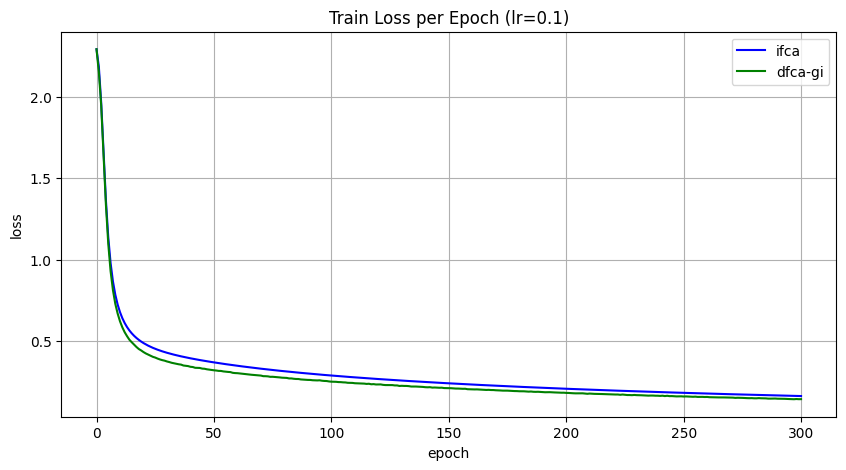

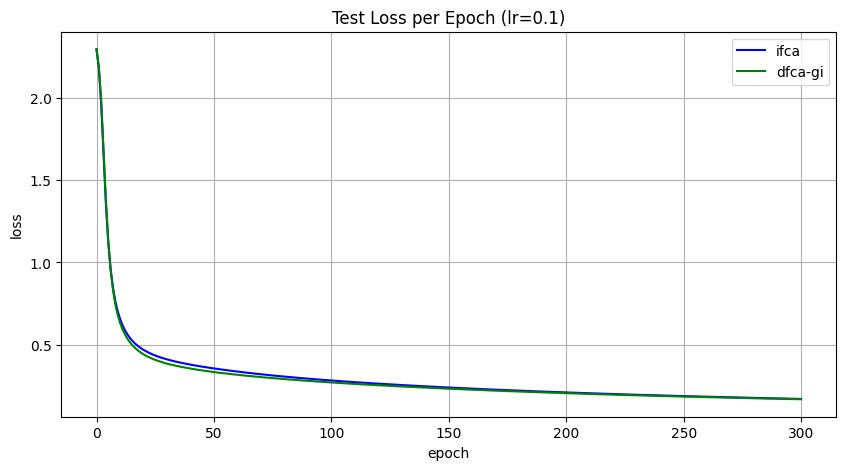

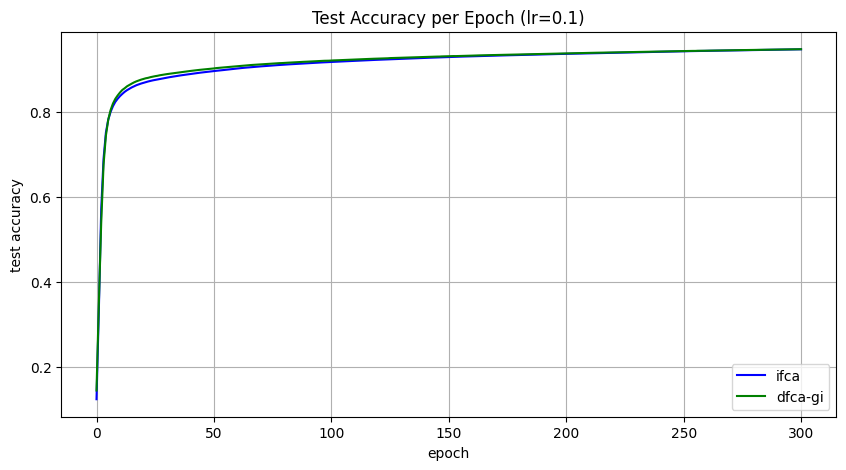

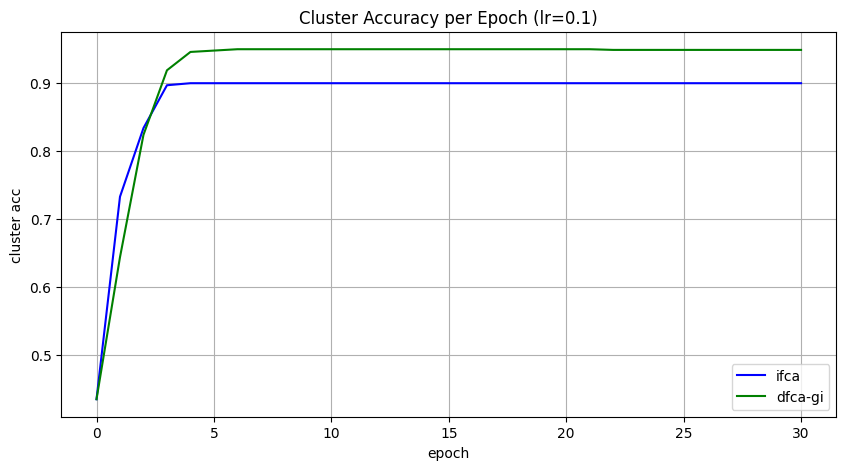

In [ ]:

r_ifca = {}
r_dfca_gi = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])



os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='blue')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='blue')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('cluster acc')
    plt.title(f'Cluster Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('graphs', '1_cluster_acc.png'))